<a href="https://colab.research.google.com/github/RvM9622/DeepLearning/blob/main/ChurnPrediction_on_Bank_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd

df = pd. read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [64]:
# !pip install imbalanced-learn

In [65]:
# from imblearn.over_sampling import RandomOverSampler

# x = df.drop(columns=['Exited'])
# y = df['Exited']

# ros = RandomOverSampler(random_state=42)

# x_resampled, y_resampled = ros.fit_resample(x, y)

# df = pd.concat([x_resampled, y_resampled], axis=1)

# print(df['Exited'].value_counts())

In [66]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [67]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [69]:
!pip install category_encoders

In [70]:
from category_encoders import OrdinalEncoder

obj_col = ['Geography', 'Gender']
encoder = OrdinalEncoder(cols = obj_col)
df = encoder.fit_transform(df)

In [71]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [72]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [73]:
from sklearn.preprocessing import MinMaxScaler

scalable = ['CreditScore', 'Balance', 'EstimatedSalary', ]
scaler = MinMaxScaler()
df[scalable] = scaler.fit_transform(df[scalable])

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,1,42,2,0.000000,1,1,1,0.506735,1
1,0.516,2,1,41,1,0.334031,1,0,1,0.562709,0
2,0.304,1,1,42,8,0.636357,3,1,0,0.569654,1
3,0.698,1,1,39,1,0.000000,2,0,0,0.469120,0
4,1.000,2,1,43,2,0.500246,1,1,1,0.395400,0


In [75]:
x = df.drop('Exited', axis = 1)
y = df['Exited']

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [77]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [78]:
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(10, input_shape= (10,), activation = 'relu'),
                          keras.layers.Dense(25, activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')
                          ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8002 - loss: 1.1335
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.5437
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7939 - loss: 0.5248
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8003 - loss: 0.5077
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7950 - loss: 0.4909
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.4699
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8041 - loss: 0.4498
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7992 - loss: 0.4493
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8140 - loss: 0.4336
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8102 - loss: 0.4377
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8049 - loss: 0.4407
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [81]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8122 - loss: 0.4196


[0.4282675087451935, 0.8115000128746033]

In [82]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [83]:
y_pred[:10]

array([[0.19076423],
       [0.3380693 ],
       [0.1948269 ],
       [0.12971866],
       [0.16029921],
       [0.6805028 ],
       [0.08478819],
       [0.08337981],
       [0.4048508 ],
       [0.731286  ]], dtype=float32)

In [84]:
y_predictions = []
for element in y_pred:
  if element >= 0.5:
    y_predictions.append(1)
  else:
    y_predictions.append(0)

In [85]:
import tensorflow as tf

cm = tf.math.confusion_matrix(y_test, y_predictions)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1526,   69],
       [ 308,   97]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

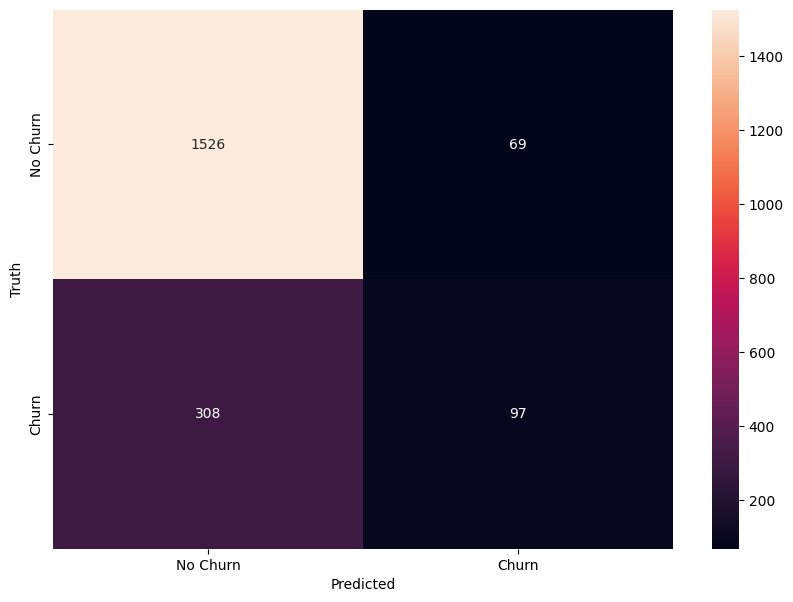

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['No Churn', 'Churn']
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d', xticklabels = class_labels, yticklabels= class_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [87]:
accuracy = (1526+97)/(1526+69+308+97)
accuracy

0.8115